#### Full Dataset


In [1]:
"""
-----------------------------------------------------------------------------------------------------------
|                                                                                                         |
-----------------------------------------------------------------------------------------------------------

regular splitting

-----------------------------------------------------------------------------------------------------------
|                               70%                                      |     15%          |        15%  |
-----------------------------------------------------------------------------------------------------------

Cross Validation

-----------------------------------------------------------------------------------------------------------
|            |                 |               |                |                       |                 |
----------------------------------------------------------------------------------------------------------

"""

'\n-----------------------------------------------------------------------------------------------------------\n|                                                                                                         |\n-----------------------------------------------------------------------------------------------------------\n\nregular splitting\n\n-----------------------------------------------------------------------------------------------------------\n|                               70%                                      |     15%          |        15%  |\n-----------------------------------------------------------------------------------------------------------\n\nCross Validation\n\n-----------------------------------------------------------------------------------------------------------\n|            |                 |               |                |                       |                 |\n--------------------------------------------------------------------------------

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import(
                                    StratifiedKFold,
                                    cross_validate
)
from sklearn.metrics import (
                            classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            precision_recall_curve,
                            accuracy_score,
                            f1_score,
                            precision_score,
                            recall_score
)
warnings.filterwarnings("ignore")

### 1. Load the Data

In [3]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/y_test.npz')['arr_0']

### 2. Configure k-Fold CV

In [4]:
cv = StratifiedKFold(
    n_splits =6,
    random_state=42,
    shuffle=True
)


In [5]:
model_lr  = LogisticRegression(
                            random_state =42,
                            max_iter = 1000,

)
#model_lr.fit(X_train, Y_train)

In [6]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='accuracy',
                            return_train_score=True
)



In [7]:
cv_results

{'fit_time': array([0.01734233, 0.0186193 , 0.01770782, 0.01299357, 0.0138216 ,
        0.01614308]),
 'score_time': array([0.00094318, 0.00144482, 0.00081944, 0.00091338, 0.00141001,
        0.00124025]),
 'test_score': array([0.75217391, 0.75144928, 0.7519942 , 0.74619289, 0.75271936,
        0.77810007]),
 'train_score': array([0.7600058 , 0.76029582, 0.7584457 , 0.7568508 , 0.75743077,
        0.75612585])}

In [8]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']

for score in score_arr:
    cv_results = cross_validate(
                                model_lr,
                                X_train, 
                                Y_train,
                                cv=cv, scoring=score,
                                return_train_score=True
    )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)
    
    print(f"{score} : {test_score_avg}")





accuracy : 0.7554382858123754
precision : 0.7361723507317679
recall : 0.7965177425800888
f1 : 0.7651297423834613


In [9]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='f1',
                            return_train_score=False
)
cv_results

{'fit_time': array([0.01160359, 0.01200151, 0.01436973, 0.0139575 , 0.02377486,
        0.01647973]),
 'score_time': array([0.00246286, 0.00174856, 0.00169635, 0.00260353, 0.00183392,
        0.00165105]),
 'test_score': array([0.76381215, 0.76197085, 0.76150628, 0.75694444, 0.76203768,
        0.78450704])}

In [10]:
best_index = np.argmax(cv_results['test_score'])

fold_indices= list(cv.split(X_train, Y_train))

fold_indices
best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [11]:
seed = 42
np.random.seed(seed)

model_lr  = LogisticRegression(
                               random_state = 42,
                               max_iter = 1000, 
)

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_hat_train

array([0., 0., 1., ..., 1., 0., 1.])

In [13]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [14]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7502
Precision: 0.5176
Recall: 0.8284
F1 Score: 0.6371


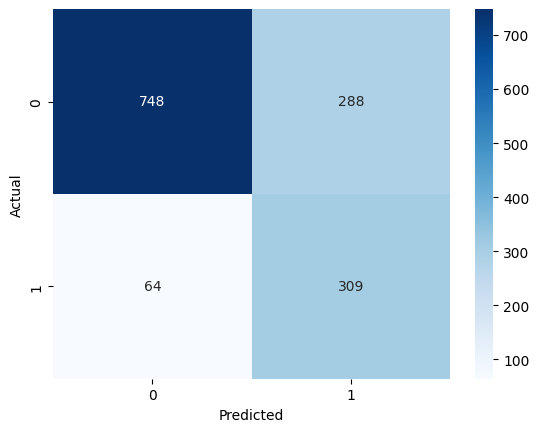

In [15]:
cm = confusion_matrix(Y_test, Y_hat_test)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()